In [ ]:
#import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#truyền dữ liệu
x_train = pd.read_csv('X_train.csv')
x_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')

x_train



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7812801850,20141015T000000,3,1.00,1180,6050,1.0,0,0,3,6,820,360,1944,0,98178,47.4945,-122.249,1070,6050
1,2423069039,20140806T000000,3,2.50,2500,51836,1.0,0,0,3,9,1510,990,2013,0,98027,47.4694,-121.989,2270,54450
2,7831800395,20140515T000000,2,1.00,880,6345,1.0,0,0,3,7,880,0,1919,0,98106,47.5341,-122.358,1440,6345
3,1233100601,20141024T000000,2,1.00,840,7414,1.0,0,0,4,6,840,0,1928,0,98033,47.6771,-122.172,1740,9784
4,2768200209,20141006T000000,2,2.50,1500,1174,2.0,0,0,3,8,1140,360,2014,0,98107,47.6689,-122.363,1550,1519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19446,5104512060,20141212T000000,4,3.00,2430,7243,2.0,0,0,3,8,2430,0,2003,0,98038,47.3533,-122.016,2430,7084
19447,4178500640,20150507T000000,4,2.50,1880,9426,2.0,0,0,4,7,1880,0,1990,0,98042,47.3584,-122.089,1760,7040
19448,7883606725,20141111T000000,3,1.00,1100,6000,1.5,0,0,2,6,1100,0,1926,0,98108,47.5279,-122.318,960,5880
19449,8562970040,20140516T000000,5,3.25,3690,12353,2.0,0,0,5,9,3690,0,1977,0,98155,47.7672,-122.292,2290,9082


In [ ]:
x_train.shape, y_train.shape

((19451, 20), (19451, 1))

In [ ]:
x_train.isna().sum() #tính tổng các dữ liệu bị NaN hoặc Null

,0
id,0
date,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
x_train[x_train.duplicated()] #output ra các row với dữ liệu bị duplicate

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


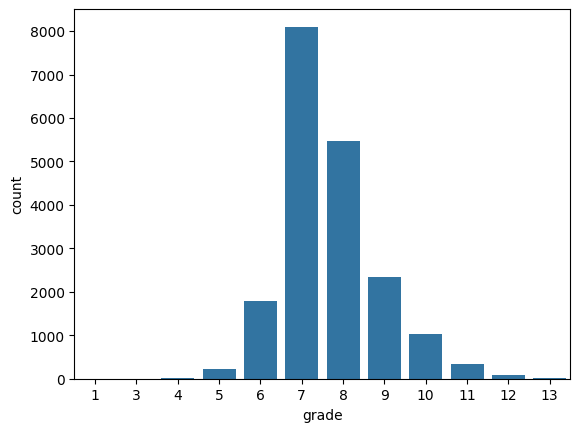

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count = x_train.groupby('grade').size().reset_index(name='count')
sns.barplot(x='grade', y='count', data=count)
plt.show()


In [ ]:
#chia tập dữ liệu thành train, val, test phục vụ cho quá trình huấn luyện model
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((11670, 20), (3890, 20), (3891, 20), (11670, 1), (3890, 1), (3891, 1))

In [ ]:
#xóa bỏ các trường ko cần thiết cho train và val và test
X_train = X_train.drop(['id','date','zipcode','long'], axis=1, inplace=False)
X_val = X_val.drop(['id','date','zipcode','long'], axis=1, inplace=False)
X_test = X_test.drop(['id','date','zipcode','long'], axis=1, inplace=False)
X_pred = x_test.drop(['id','date','zipcode','long'], axis=1, inplace=False)

In [ ]:
X_train.head(), X_val.head()

(       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 8668          4       3.00         3640      5096     2.0           0     0   
 5358          3       2.50         1780      6771     1.0           0     0   
 14742         3       1.75         1930      8442     1.0           0     0   
 212           3       1.50         1630     82764     1.0           0     0   
 16626         2       1.00          920      8612     1.0           0     0   
 
        condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
 8668           3      8        2740            900      2010             0   
 5358           3      7        1230            550      1990             0   
 14742          4      7        1930              0      1953             0   
 212            4      6        1630              0      1948             0   
 16626          5      7         920              0      1947             0   
 
            lat  sqft_living15  sqft_lot15

In [ ]:
columns = ['sqft_living', 'bathrooms','bedrooms']

for column in columns:
    lower_bound = np.percentile(X_train[column], 1)
    upper_bound = np.percentile(X_train[column], 99)
    X_train = X_train[(X_train[column] >= lower_bound) & (X_train[column] <= upper_bound)]
    X_val = X_val[(X_val[column] >= lower_bound) & (X_val[column] <= upper_bound)]
    Y_train = Y_train.loc[X_train.index]
    Y_val = Y_val.loc[X_val.index]

In [ ]:
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((11225, 16), (3757, 16), (3891, 16), (11225, 1), (3757, 1), (3891, 1))

In [ ]:
#chuẩn hóa dữ liệu bằng scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)
X_pred = scaler.fit_transform(X_pred)
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)
X_pred = pd.DataFrame(X_pred)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.765098,1.302559,2.000868,-0.240127,0.947514,-0.080907,-0.296037,-0.635586,0.333628,1.321026,1.445148,1.330054,-0.212727,-0.120736,-0.092965,-0.130444
1,-0.451364,0.582372,-0.330589,-0.199755,-0.913852,-0.080907,-0.296037,-0.635586,-0.581118,-0.710543,0.621883,0.642590,-0.212727,-0.258486,-0.292874,-0.223186
2,-0.451364,-0.497907,-0.142568,-0.159480,-0.913852,-0.080907,-0.296037,0.907333,-0.581118,0.231244,-0.671818,-0.629217,-0.212727,0.517527,-0.277496,-0.159095
3,-0.451364,-0.858000,-0.518610,1.631884,-0.913852,-0.080907,-0.296037,0.907333,-1.495865,-0.172379,-0.671818,-0.801083,-0.212727,-0.614760,-0.446650,7.152335
4,-1.667826,-1.578186,-1.408575,-0.155382,-0.913852,-0.080907,-0.296037,2.450251,-0.581118,-1.127620,-0.671818,-0.835456,-0.212727,1.258201,-0.723447,-0.177736


In [ ]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.750341,0.234098,-0.303737,-0.323076,0.930095,-0.071295,-0.294262,-0.638355,0.327173,0.061088,-0.677763,1.479193,-0.208131,-0.300891,-0.260532,-0.404516
1,-0.439626,-0.467543,-0.542374,-0.210471,-0.905664,-0.071295,-0.294262,0.888252,-0.595642,-0.195896,-0.677763,-0.815539,-0.208131,1.090084,-1.126912,-0.162938
2,0.750341,0.935739,1.354168,-0.167640,-0.905664,14.026291,5.226542,0.888252,0.327173,-0.263524,3.006298,-0.267544,-0.208131,1.109834,1.001040,0.103310
3,-0.439626,1.988200,-0.605174,-0.361195,0.930095,-0.071295,-0.294262,-0.638355,0.327173,-0.696340,0.077942,0.828448,-0.208131,0.463017,-0.625324,-0.454311
4,-0.439626,-0.116722,-0.504695,-0.184706,-0.905664,-0.071295,-0.294262,0.888252,-0.595642,-0.993901,0.786415,-1.021038,-0.208131,0.031335,0.241057,-0.304878


In [ ]:
Y_train.head()

,price
8668,630000.0
5358,310000.0
14742,825000.0
212,300000.0
16626,340895.0


In [ ]:
Y_val.head()

,price
13061,338800.0
18255,438750.0
3283,1955000.0
16096,625000.0
7684,560000.0


In [ ]:
X_train.to_csv('x_train.csv')
Y_train.to_csv('y_train.csv')
X_val.to_csv('x_val.csv')
Y_val.to_csv('y_val.csv')
X_test.to_csv('x_test.csv')
Y_test.to_csv('y_test.csv')
X_pred.to_csv('x_pred.csv')

In [ ]:
from google.colab import files
files.download('x_train.csv')
files.download('y_train.csv')
files.download('x_val.csv')
files.download('y_val.csv')
files.download('x_test.csv')
files.download('y_test.csv')
files.download('x_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>